In [1]:
import pandas as pd
print(pd.__version__)

1.5.3


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
#ensemble - predict several base estimators built with learning algorithm
#train and test files are now in model_selection and not in cross_validation
from sklearn.model_selection import train_test_split
%matplotlib inline
#backend to be inline output

In [3]:
#using pandas to read the database
data = pd.read_csv('mnist_train.csv')
data = pd.read_csv('mnist_test.csv')

In [4]:
#to view column heads
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#extracting data from the dataset and to view
a = data.iloc[2,1:].values

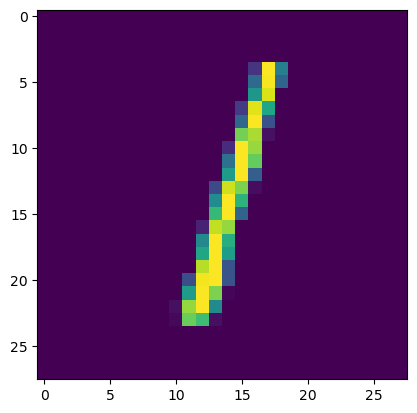

In [6]:
a = a.reshape(28,28).astype('uint8')
#array-used unsigned 8bit integer
plt.imshow(a)

In [7]:
#to separate labels and data values
#everything except labels
df_x = data.iloc[:,1:]
#only labels
df_y = data.iloc[:,0]

In [8]:
#to create test / train size
x_train , x_test , y_train , y_test = train_test_split(df_x, df_y, test_size = 0.2 , random_state = 4) 

In [9]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
4983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6789,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y_train.head()

4983    3
6789    1
2221    1
6043    5
1564    7
Name: label, dtype: int64

In [11]:
rf = RandomForestClassifier(n_estimators=100)

In [13]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [14]:
predic = rf.predict(x_test)

In [15]:
predic


array([1, 3, 7, ..., 0, 1, 0], dtype=int64)

In [16]:
#true label is in y_test
#prediction accuracy check
c = y_test.values
count = 0
for i in range(len(predic)):
    if predic[i] == c[i]:
        count = count+1

In [17]:
count

1900

In [19]:
#total values the prediction code was run on
len(predic)


2000

In [20]:
# accuracy value
1900/2000

0.95